In [1]:
import shutil
import os
# Output directory to clear
output_dir = "D:\\\PERKULIAHAN\\pyenv\\VOICECLONE\\voice_resampled\\segments"
combined_dir = "D:\\PERKULIAHAN\\pyenv\\VOICECLONE\\voice_resampled\\segment_combine"
# Clear the contents of the output directorya and combined segments directories
shutil.rmtree(output_dir, ignore_errors=True)
shutil.rmtree(combined_dir,ignore_errors=True)
os.makedirs(output_dir, exist_ok=True)
os.makedirs(combined_dir, exist_ok=True)
print(f"Contents of {output_dir} cleared.")
print(f"Contents of {combined_dir} cleared")

Contents of D:\\PERKULIAHAN\pyenv\VOICECLONE\voice_resampled\segments cleared.
Contents of D:\PERKULIAHAN\pyenv\VOICECLONE\voice_resampled\segment_combine cleared


# Data Preparation

In [2]:
from pydub import AudioSegment
def adjust_audio_length(audio_file, target_duration):
    audio = AudioSegment.from_file(audio_file)
    current_duration = len(audio) / 1000  # convert to seconds

    if current_duration > target_duration:
        # If the audio is longer than the target, trim it
        start_trim = (current_duration - target_duration) / 2 * 1000
        end_trim = start_trim + (target_duration * 1000)
        trimmed_audio = audio[start_trim:end_trim]
    else:
        # If the audio is shorter than the target, loop it until it reaches the target length
        repeats = int(target_duration / current_duration) + 1
        extended_audio = audio * repeats
        trimmed_audio = extended_audio[:target_duration * 1000]

    return trimmed_audio

# Adjust the two specific audio files
audio_1_path = "D:\\PERKULIAHAN\\pyenv\\VOICECLONE\\voice_resampled\\3_suaraAndre.wav"
audio_2_path = "D:\\PERKULIAHAN\\pyenv\\VOICECLONE\\voice_resampled\\3_suaraZahra.wav"
target_duration = 60  # 60 seconds

adjusted_audio_1 = adjust_audio_length(audio_1_path, target_duration)
adjusted_audio_2 = adjust_audio_length(audio_2_path, target_duration)

# Export the adjusted audios
adjusted_audio_1.export("3_suaraAndre.wav", format="wav")
adjusted_audio_2.export("3_suaraZahra.wav", format="wav")

d:\PERKULIAHAN\pyenv\.venv\Lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


<_io.BufferedRandom name='3_suaraZahra.wav'>

In [3]:
import os
from pydub import AudioSegment

# Path ke folder yang berisi file WAV
folder_path = r"D:\PERKULIAHAN\pyenv\VOICECLONE\voice_resampled"

# Durasi target dalam milidetik
target_duration = 60 * 1000  # 60 detik
segment_duration = 1500  # 1.5 detik

# Folder untuk menyimpan segmen-segmen
output_folder = os.path.join(folder_path, "segments")
os.makedirs(output_folder, exist_ok=True)

for filename in os.listdir(folder_path):
    if filename.endswith(".wav"):
        file_path = os.path.join(folder_path, filename)
        audio = AudioSegment.from_wav(file_path)
        
        # Dapatkan durasi asli file audio
        original_duration = len(audio)

        if original_duration > target_duration:
            # Potong audio jika lebih panjang dari 60 detik
            audio = audio[:target_duration]
        else:
            # Tambahkan silence (diam) jika lebih pendek dari 60 detik
            silence = AudioSegment.silent(duration=target_duration - original_duration)
            audio = audio + silence

        # Simpan file audio yang telah diubah durasinya
        #adjusted_file_path = os.path.join(output_folder, f"adjusted_{filename}")
        #audio.export(adjusted_file_path, format="wav")

        # Pecah file audio menjadi segmen-segmen 1.5 detik
        for i in range(0, len(audio), segment_duration):
            segment = audio[i:i + segment_duration]
            segment_file_path = os.path.join(output_folder, f"{filename[:-4]}_segment_{i // segment_duration}.wav")
            segment.export(segment_file_path, format="wav")

print("Proses penyesuaian durasi dan pemecahan file selesai.")


Proses penyesuaian durasi dan pemecahan file selesai.


In [4]:
import os
import librosa
import soundfile as sf

# Path to the dataset
dataset_path = "D:\\PERKULIAHAN\\pyenv\\VOICECLONE\\voice_resampled\\segments"

# Output directory to save the combined files
output_dir = "D:\\PERKULIAHAN\\pyenv\\VOICECLONE\\voice_resampled\\segment_combine"

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# List of speaker folders
speaker_folders = [
    "Adit", "Ahmed", "Aisyah", "AjiRidwan", "AmeliaSavitri", "Andita","Andre", "Anita", "David",
    "Destia", "Dimas", "Evan", "Fahmi", "Firda", "Gilang", "Hana", "Helmi", "Ima", "Irsyad",
    "Jasmine", "Jenal", "Malih", "Maulana", "MutiaraRamadani", "Nezha", "NisaDesa", "Opi",
    "Osi", "Ozi", "Quin", "Rahadian", "RaihanFadhillah", "Restu", "Rida", "Sela", "Sepiola",
    "Sesaria", "Syaekhu", "UlfaUsk", "UridiaUlya", "Vidya", "Wahab","Zahra", "ZakiRoblox"
]

# Number of files to combine for each speaker
num_files_to_combine = 40  # in seconds


In [5]:
# Source path where all segmented files are located
source_path = "D:\\PERKULIAHAN\\pyenv\\VOICECLONE\\voice_resampled\\segments"

# Create a dictionary to map speaker names to folder paths
speaker_dict = {name.lower(): os.path.join(source_path, name) for name in speaker_folders}

# Make sure all speaker folders exist
for folder_path in speaker_dict.values():
    os.makedirs(folder_path, exist_ok=True)

# Iterate through each file in the source directory
for filename in os.listdir(source_path):
    # Skip if it's not a file
    if not os.path.isfile(os.path.join(source_path, filename)):
        continue
    
    # Extract the speaker name from the filename
    for speaker in speaker_dict.keys():
        if speaker in filename.lower():
            source_file = os.path.join(source_path, filename)
            destination_file = os.path.join(speaker_dict[speaker], filename)
            # Move the file to the corresponding speaker's folder
            shutil.move(source_file, destination_file)
            break

print("Files have been organized into their respective folders.")


Files have been organized into their respective folders.


In [6]:

# Path ke folder utama yang berisi subfolder dengan segmen
main_folder_path = r"D:\PERKULIAHAN\pyenv\VOICECLONE\voice_resampled\segments"

# Fungsi untuk mengganti nama file dalam suatu folder
def rename_files_in_folder(folder_path):
    files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    files.sort()  # Mengurutkan file untuk memastikan urutan yang benar

    for index, filename in enumerate(files):
        file_extension = os.path.splitext(filename)[1]
        new_name = f"{index}{file_extension}"
        os.rename(os.path.join(folder_path, filename), os.path.join(folder_path, new_name))

# Loop melalui setiap subfolder dan ganti nama file di dalamnya
for folder_name in os.listdir(main_folder_path):
    subfolder_path = os.path.join(main_folder_path, folder_name)
    if os.path.isdir(subfolder_path):
        rename_files_in_folder(subfolder_path)

print("Proses penggantian nama file selesai.")


Proses penggantian nama file selesai.


In [7]:
# Iterate over each speaker's folder
for speaker_folder in speaker_folders:
    speaker_folder_path = os.path.join(dataset_path, speaker_folder)

    # List the first num_files_to_combine WAV files in the speaker's folder
    wav_files = [f"{i}.wav" for i in range(num_files_to_combine)]

    combined_audio = []
    sr = None

    # Combine all WAV files into a single long file
    for wav_file in wav_files:
        wav_file_path = os.path.join(speaker_folder_path, wav_file)

        if os.path.exists(wav_file_path):
            try:
                audio, sr = librosa.load(wav_file_path, sr=None)
                combined_audio.extend(audio)
            except Exception as e:
                print(f"Error loading {wav_file_path}: {e}")
        else:
            print(f"File not found: {wav_file_path}")

    # Check if there is any audio to save
    if combined_audio:
        output_file_path = os.path.join(output_dir, f"{speaker_folder}_combined.wav")
        sf.write(output_file_path, combined_audio, sr)
        print(f"Combined file saved: {output_file_path}")
    else:
        print(f"No audio combined for speaker: {speaker_folder}")

print("Combination complete. Combined files saved in:", output_dir)

'''buat program yg otomatis bikin folder sesuai namanya'''


Combined file saved: D:\PERKULIAHAN\pyenv\VOICECLONE\voice_resampled\segment_combine\Adit_combined.wav
Combined file saved: D:\PERKULIAHAN\pyenv\VOICECLONE\voice_resampled\segment_combine\Ahmed_combined.wav
Combined file saved: D:\PERKULIAHAN\pyenv\VOICECLONE\voice_resampled\segment_combine\Aisyah_combined.wav
Combined file saved: D:\PERKULIAHAN\pyenv\VOICECLONE\voice_resampled\segment_combine\AjiRidwan_combined.wav
Combined file saved: D:\PERKULIAHAN\pyenv\VOICECLONE\voice_resampled\segment_combine\AmeliaSavitri_combined.wav
Combined file saved: D:\PERKULIAHAN\pyenv\VOICECLONE\voice_resampled\segment_combine\Andita_combined.wav
Combined file saved: D:\PERKULIAHAN\pyenv\VOICECLONE\voice_resampled\segment_combine\Andre_combined.wav
Combined file saved: D:\PERKULIAHAN\pyenv\VOICECLONE\voice_resampled\segment_combine\Anita_combined.wav
Combined file saved: D:\PERKULIAHAN\pyenv\VOICECLONE\voice_resampled\segment_combine\David_combined.wav
Combined file saved: D:\PERKULIAHAN\pyenv\VOICECLON

'buat program yg otomatis bikin folder sesuai namanya'

In [8]:
from IPython.display import display, Audio

# Function to play audio file
def play_audio(audio_path):
    display(Audio(filename=audio_path))

# Play a specific combined audio file
speaker_folder = "ZakiRoblox_combined"
audio_path = os.path.join(output_dir, f"{speaker_folder}.wav")
print(f"Click the play button to listen: {audio_path}")
play_audio(audio_path)

Click the play button to listen: D:\PERKULIAHAN\pyenv\VOICECLONE\voice_resampled\segment_combine\ZakiRoblox_combined.wav


# Feature Extraction

C:\Users\benyl\AppData\Local\Temp\ipykernel_27632\898491012.py:20: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)


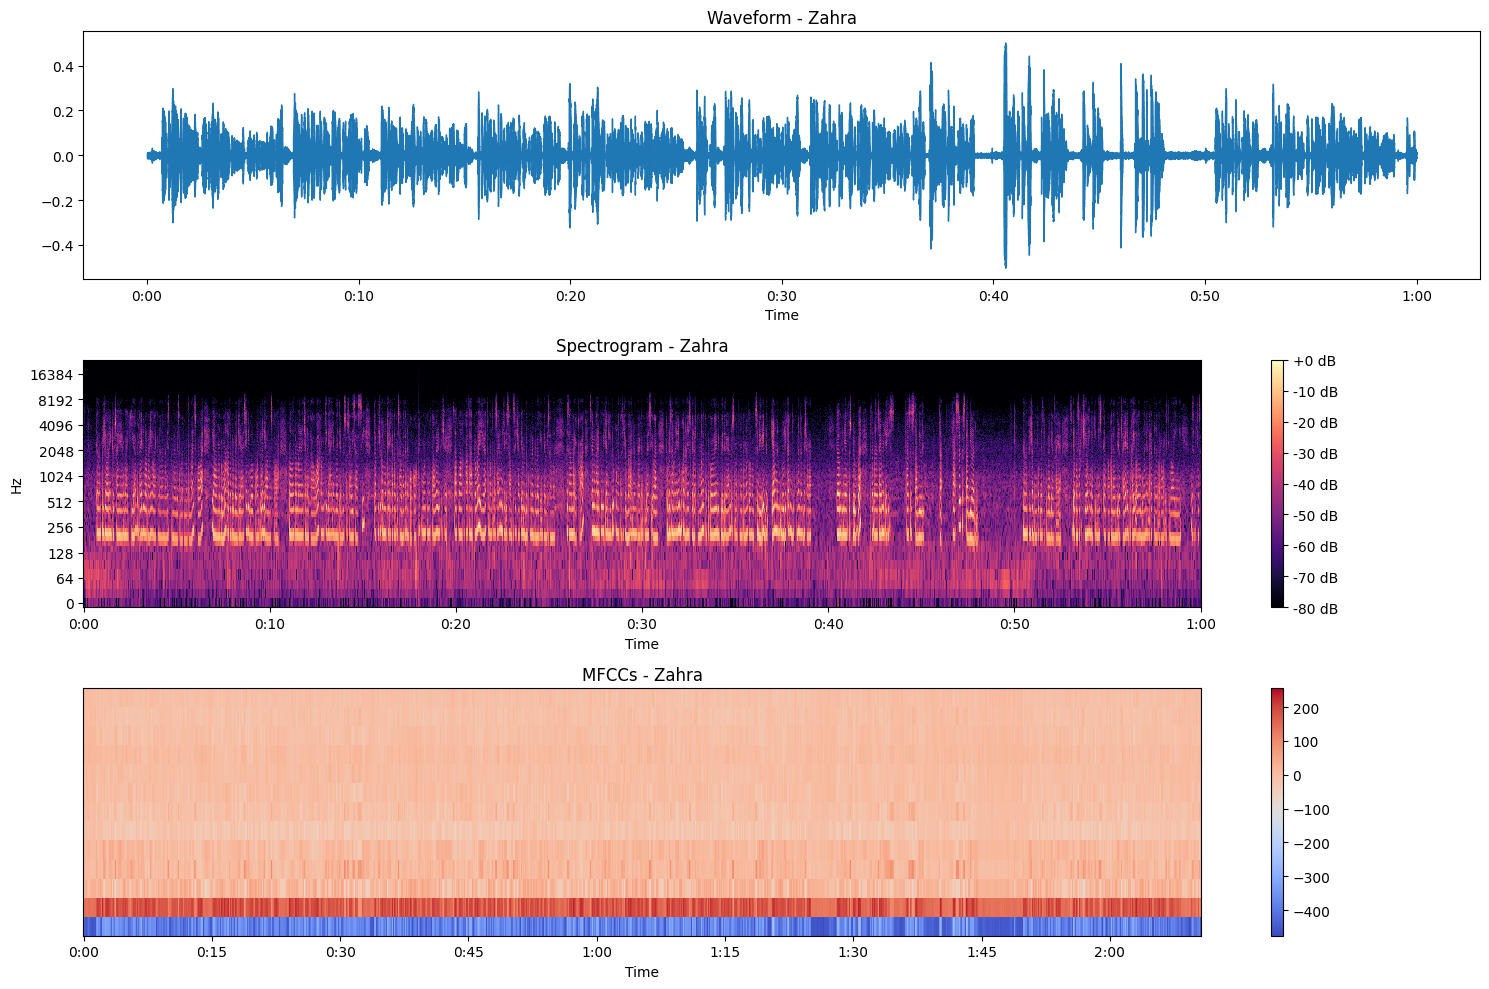

In [10]:
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
# Function to plot the waveform, spectrogram, and MFCCs
def plot_audio_features(audio_path):
    # Load audio file
    y, sr = librosa.load(audio_path, sr=None)

    # Extract speaker name from the file path
    speaker_name = os.path.basename(audio_path).split('_')[0]

    # Plot the waveform
    plt.figure(figsize=(15, 10))
    plt.subplot(3, 1, 1)
    librosa.display.waveshow(y, sr=sr)
    plt.title(f'Waveform - {speaker_name}')

    # Plot the spectrogram
    plt.subplot(3, 1, 2)
    D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Spectrogram - {speaker_name}')

    # Plot the MFCCs
    plt.subplot(3, 1, 3)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    librosa.display.specshow(mfccs, x_axis='time')
    plt.colorbar()
    plt.title(f'MFCCs - {speaker_name}')

    plt.tight_layout()
    plt.show()

# Paths to the combined audio files
audio_paths = [
    'D:\\PERKULIAHAN\\pyenv\\VOICECLONE\\voice_resampled\\segment_combine\\Zahra_combined.wav'
]

# Plot features for each audio file
for audio_path in audio_paths:
    plot_audio_features(audio_path)

In [12]:
import os
import librosa
import numpy as np
from sklearn.preprocessing import StandardScaler

# Path to the dataset
parent_dir = "D:\\PERKULIAHAN\\pyenv\\VOICECLONE\\voice_resampled\\segments"

# List of speaker folders
speaker_folders = [
    "Adit", "Ahmed", "Aisyah", "AjiRidwan", "AmeliaSavitri", "Andita","Andre", "Anita", "David",
    "Destia", "Dimas", "Evan", "Fahmi", "Firda", "Gilang", "Hana", "Helmi", "Ima", "Irsyad",
    "Jasmine", "Jenal", "Malih", "Maulana", "MutiaraRamadani", "Nezha", "NisaDesa", "Opi",
    "Osi", "Ozi", "Quin", "Rahadian", "RaihanFadhillah", "Restu", "Rida", "Sela", "Sepiola",
    "Sesaria", "Syaekhu", "UlfaUsk", "UridiaUlya", "Vidya", "Wahab","Zahra", "ZakiRoblox"
]

def extract_features(parent_dir, speaker_folders):
    features = []
    labels = []
    max_frames = 0

    # First pass: determine the maximum number of frames
    for speaker_folder in speaker_folders:
        speaker_folder_path = os.path.join(parent_dir, speaker_folder)
        for filename in os.listdir(speaker_folder_path):
            if filename.endswith(".wav"):
                file_path = os.path.join(speaker_folder_path, filename)
                audio, sr = librosa.load(file_path, sr=None, duration=1)
                mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
                max_frames = max(max_frames, mfccs.shape[1])

    # Second pass: extract features and pad MFCC matrices
    for i, speaker_folder in enumerate(speaker_folders):
        speaker_folder_path = os.path.join(parent_dir, speaker_folder)
        for filename in os.listdir(speaker_folder_path):
            if filename.endswith(".wav"):
                file_path = os.path.join(speaker_folder_path, filename)
                audio, sr = librosa.load(file_path, sr=None, duration=1)
                mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
                
                # Normalize MFCC features
                mfccs = StandardScaler().fit_transform(mfccs)
                
                # Calculate the mean of the MFCC coefficients for padding
                mean_mfcc = np.mean(mfccs, axis=1)

                # Pad MFCCs to the maximum number of frames with the mean value
                if mfccs.shape[1] < max_frames:
                    pad_width = max_frames - mfccs.shape[1]
                    pad_array = np.tile(mean_mfcc[:, np.newaxis], (1, pad_width))
                    mfccs = np.hstack((mfccs, pad_array))

                features.append(mfccs.T)
                labels.append(i)

    return np.array(features), np.array(labels)

# Extract features and labels
X, y = extract_features(parent_dir, speaker_folders)


In [13]:
# Print the first few features
for feature in X[:1]:
    print(feature)

[[-3.4599187   0.3208047   0.29941818 ...  0.27170473  0.29615963
   0.28807035]
 [-3.4605916   0.27819365  0.34928435 ...  0.27106214  0.27240887
   0.28454742]
 [-3.4235134   0.7645871   0.33295923 ...  0.28251553  0.3358805
   0.3026274 ]
 ...
 [-3.387759    0.92384243  0.2512139  ...  0.1484164   0.28831506
   0.19183318]
 [-3.387759    0.92384243  0.2512139  ...  0.1484164   0.28831506
   0.19183318]
 [-3.387759    0.92384243  0.2512139  ...  0.1484164   0.28831506
   0.19183318]]


# Data Splitting

In [14]:
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Encode labels with explicit classes
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
label_encoder.classes_ = np.array(speaker_folders)

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the shapes of training and validation data
print("Training Data Shape:", X_train.shape)
print("Validation Data Shape:", X_val.shape)

Training Data Shape: (1232, 94, 13)
Validation Data Shape: (264, 94, 13)


In [15]:
import tensorflow as tf

# Hybrid Model

## RNN - LSTM

In [228]:
# Define the hybrid model using both SimpleRNN and LSTM layers
model_hybrid_rnn_lstm = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(256, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Dense(len(speaker_folders), activation='softmax')
])

d:\PERKULIAHAN\pyenv\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [229]:
# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model_hybrid_rnn_lstm.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
callbacks = [
    #tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(patience=5)
]


In [277]:
# Train the model
history_hybrid_rnn_lstm = model_hybrid_rnn_lstm.fit(X_train, y_train, 
                                                    validation_data=(X_val, y_val),
                                                    epochs=100, 
                                                    batch_size=32,
                                                    callbacks=callbacks)

Epoch 1/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 136ms/step - accuracy: 0.5471 - loss: 2.4901 - val_accuracy: 0.7803 - val_loss: 1.6153 - learning_rate: 0.0000e+00
Epoch 2/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 133ms/step - accuracy: 0.5280 - loss: 2.5292 - val_accuracy: 0.7803 - val_loss: 1.6164 - learning_rate: 0.0000e+00
Epoch 3/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 133ms/step - accuracy: 0.5187 - loss: 2.5683 - val_accuracy: 0.7803 - val_loss: 1.6167 - learning_rate: 0.0000e+00
Epoch 4/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 136ms/step - accuracy: 0.5295 - loss: 2.4854 - val_accuracy: 0.7841 - val_loss: 1.6167 - learning_rate: 0.0000e+00
Epoch 5/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 6s 141ms/step - accuracy: 0.5277 - loss: 2.5284 - val_accuracy: 0.7841 - val_loss: 1.6169 - learning_rate: 0.0000e+00
Epoch 6/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 137ms/step - accuracy: 0.5506 - loss: 2.4335 - val_accuracy: 0.7803 - val_loss: 1.6175 - learning_rate: 0.0000e+00
Epoch 7/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 136ms/step - acc

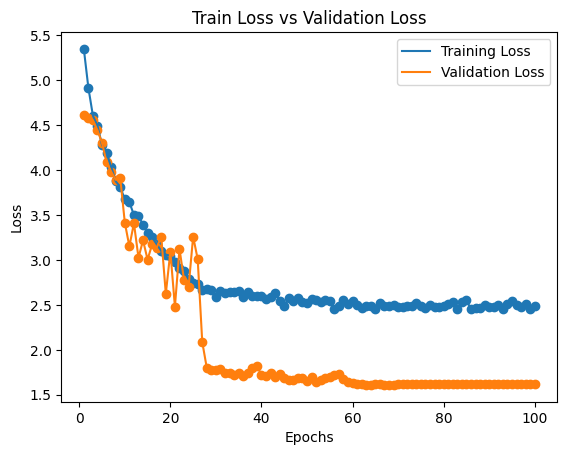

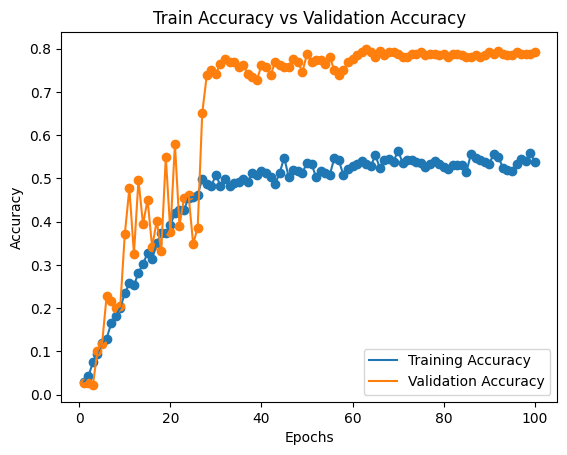

In [231]:
# Menampilkan akurasi pelatihan dan validasi beserta dengan jumlah epoch(iterasi)
train_acc_rnn_lstm = history_hybrid_rnn_lstm.history['accuracy']
val_acc_rnn_lstm = history_hybrid_rnn_lstm.history['val_accuracy']
train_loss_rnn_lstm = history_hybrid_rnn_lstm.history['loss']
val_loss_rnn_lstm = history_hybrid_rnn_lstm.history['val_loss']
epoch = range(1,len(train_acc_rnn_lstm)+1)

# Plot training vs validation loss
plt.plot(epoch,train_loss_rnn_lstm, label='Training Loss')
plt.scatter(epoch,train_loss_rnn_lstm)
plt.plot(epoch,val_loss_rnn_lstm, label='Validation Loss')
plt.scatter(epoch,val_loss_rnn_lstm)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train Loss vs Validation Loss')
plt.legend()
plt.show()

# Plot training vs validation loss
plt.plot(epoch,train_acc_rnn_lstm, label='Training Accuracy')
plt.scatter(epoch,train_acc_rnn_lstm)
plt.plot(epoch,val_acc_rnn_lstm, label='Validation Accuracy')
plt.scatter(epoch,val_acc_rnn_lstm)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train Accuracy vs Validation Accuracy')
plt.legend()
plt.show()

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step
Test Evaluation Accuracy: 0.7651515151515151
Precision -->  0.8015875853944036
Weighted F1 Score: 0.7546965063353924


d:\PERKULIAHAN\pyenv\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


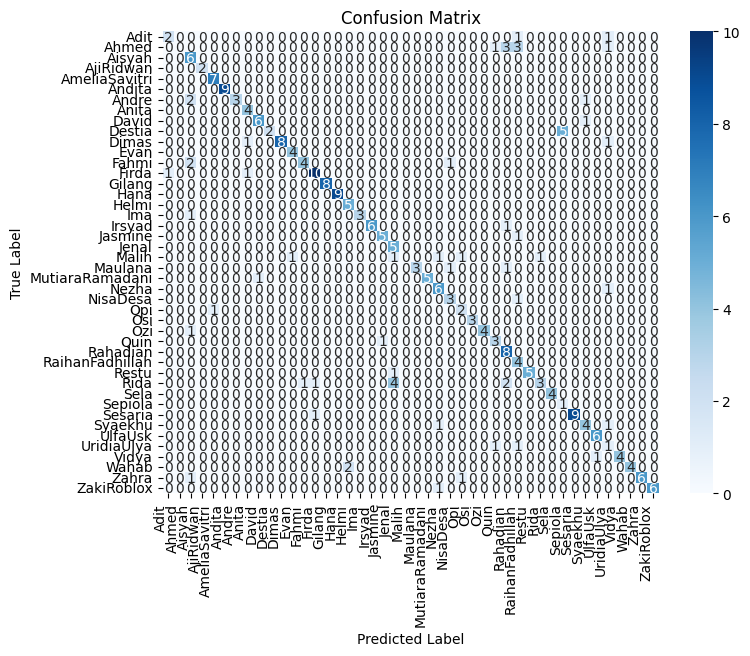

In [272]:
# Evaluate the model on the test set
y_pred_probabilities = model_hybrid_rnn_lstm.predict(X_test)
y_pred = np.argmax(y_pred_probabilities, axis=1)

# Decode labels back to original format
y_test_decoded_rnn_lstm = label_encoder.inverse_transform(y_test)
y_pred_decoded_rnn_lstm = label_encoder.inverse_transform(y_pred)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test_decoded_rnn_lstm, y_pred_decoded_rnn_lstm, labels=speaker_folders)

# Calculate accuracy
accuracy_rnn_lstm = accuracy_score(y_test_decoded_rnn_lstm, y_pred_decoded_rnn_lstm)
print(f"Test Evaluation Accuracy: {accuracy_rnn_lstm}")

# calculate precision
precision_rnn_lstm = precision_score(y_test_decoded_rnn_lstm,y_pred_decoded_rnn_lstm, average='weighted')
print(f"Precision --> ", precision_rnn_lstm)

# Calculate F1 score
f1_rnn_lstm = f1_score(y_test_decoded_rnn_lstm, y_pred_decoded_rnn_lstm, labels=speaker_folders, average='weighted')
print(f"Weighted F1 Score: {f1_rnn_lstm}")

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=speaker_folders, yticklabels=speaker_folders)

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=90, ha="right")

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [55]:
y_pred_prob_positive = y_pred_probabilities[:, 1]  # Assuming the second column is the positive class
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_positive, pos_label=1)
roc_auc_rnn_lstm = auc(fpr, tpr)
roc_auc_rnn_lstm

0.98193359375

## LSTM-GRU

In [56]:
# Define the hybrid model using both LSTM and GRU layers
model_hybrid_lstm_gru = tf.keras.Sequential([
    tf.keras.layers.LSTM(256, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.GRU(128, return_sequences=True),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.GRU(128),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Dense(len(speaker_folders), activation='softmax')
])

d:\PERKULIAHAN\pyenv\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [57]:
# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model_hybrid_lstm_gru.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(patience=5)
]

In [281]:
# Train the model
history_hybrid_lstm_gru = model_hybrid_lstm_gru.fit(X_train, y_train, 
                                                    validation_data=(X_val, y_val),
                                                    epochs=100, 
                                                    batch_size=32,
                                                    callbacks=callbacks)

Epoch 1/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 188ms/step - accuracy: 0.4153 - loss: 2.7017 - val_accuracy: 0.7386 - val_loss: 1.6841 - learning_rate: 1.0000e-17
Epoch 2/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 182ms/step - accuracy: 0.4278 - loss: 2.6636 - val_accuracy: 0.7386 - val_loss: 1.6852 - learning_rate: 1.0000e-17
Epoch 3/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 187ms/step - accuracy: 0.4399 - loss: 2.6030 - val_accuracy: 0.7386 - val_loss: 1.6842 - learning_rate: 1.0000e-17
Epoch 4/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 187ms/step - accuracy: 0.4130 - loss: 2.7002 - val_accuracy: 0.7386 - val_loss: 1.6837 - learning_rate: 1.0000e-17
Epoch 5/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 186ms/step - accuracy: 0.4472 - loss: 2.5965 - val_accuracy: 0.7348 - val_loss: 1.6844 - learning_rate: 1.0000e-17
Epoch 6/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 186ms/step - accuracy: 0.4278 - loss: 2.6408 - val_accuracy: 0.7386 - val_loss: 1.6836 - learning_rate: 1.0000e-17
Epoch 7/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 186ms/step - acc

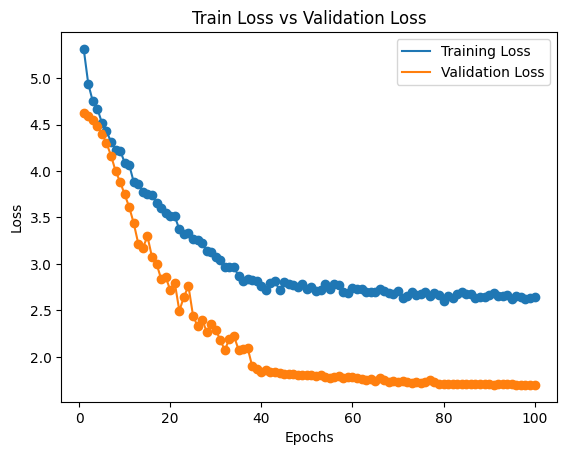

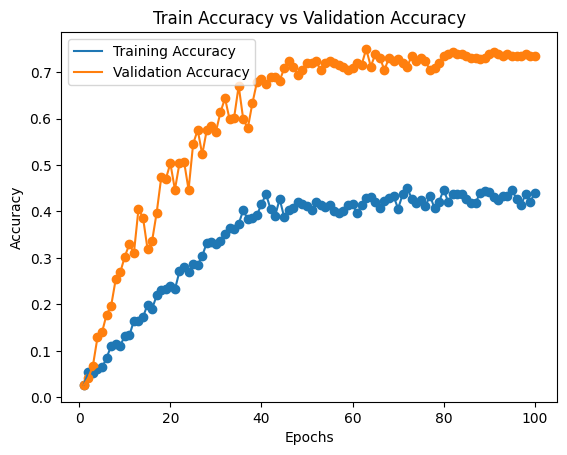

In [59]:
# Menampilkan akurasi pelatihan dan validasi beserta dengan jumlah epoch(iterasi)
train_acc_lstm_gru = history_hybrid_lstm_gru.history['accuracy']
val_acc_lstm_gru = history_hybrid_lstm_gru.history['val_accuracy']
train_loss_lstm_gru = history_hybrid_lstm_gru.history['loss']
val_loss_lstm_gru = history_hybrid_lstm_gru.history['val_loss']
epoch = range(1,len(train_acc_lstm_gru)+1)

# Plot training vs validation loss
plt.plot(epoch,train_loss_lstm_gru, label='Training Loss')
plt.scatter(epoch,train_loss_lstm_gru)
plt.plot(epoch,val_loss_lstm_gru, label='Validation Loss')
plt.scatter(epoch,val_loss_lstm_gru)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train Loss vs Validation Loss')
plt.legend()
plt.show()

# Plot training vs validation loss
plt.plot(epoch,train_acc_lstm_gru, label='Training Accuracy')
plt.scatter(epoch,train_acc_lstm_gru)
plt.plot(epoch,val_acc_lstm_gru, label='Validation Accuracy')
plt.scatter(epoch,val_acc_lstm_gru)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train Accuracy vs Validation Accuracy')
plt.legend()
plt.show()

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step
Test Evaluation Accuracy: 0.7083333333333334
Precision -->  0.7653540272858455
Weighted F1 Score: 0.6898970032252224


d:\PERKULIAHAN\pyenv\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


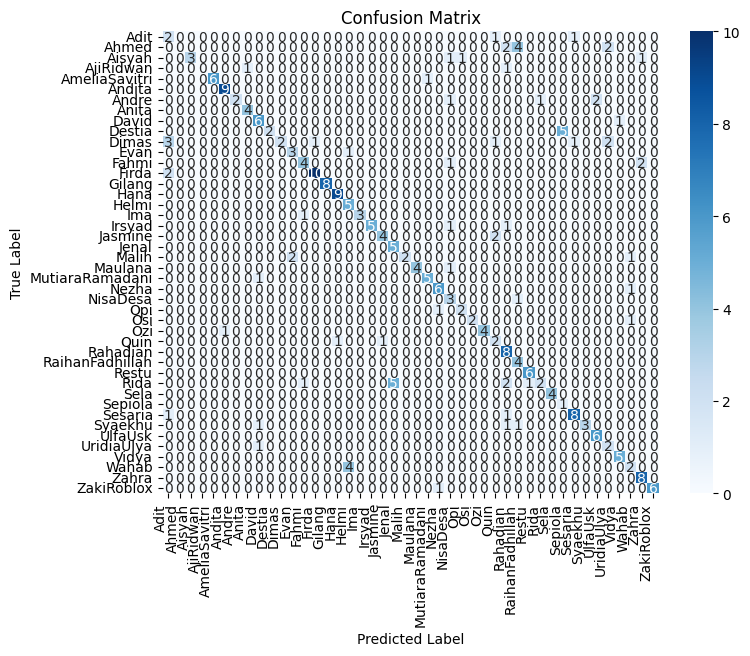

In [271]:
# Evaluate the model on the test set
y_pred_probabilities = model_hybrid_lstm_gru.predict(X_test)
y_pred = np.argmax(y_pred_probabilities, axis=1)

# Decode labels back to original format
y_test_decoded_lstm_gru = label_encoder.inverse_transform(y_test)
y_pred_decoded_lstm_gru = label_encoder.inverse_transform(y_pred)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test_decoded_lstm_gru, y_pred_decoded_lstm_gru, labels=speaker_folders)

# Calculate accuracy
accuracy_lstm_gru = accuracy_score(y_test_decoded_lstm_gru, y_pred_decoded_lstm_gru)
print(f"Test Evaluation Accuracy: {accuracy_lstm_gru}")

# calculate precision
precision_lstm_gru = precision_score(y_test_decoded_lstm_gru,y_pred_decoded_lstm_gru, average='weighted')
print(f"Precision --> ", precision_lstm_gru)

# Calculate F1 score
f1_lstm_gru = f1_score(y_test_decoded_lstm_gru, y_pred_decoded_lstm_gru, labels=speaker_folders, average='weighted')
print(f"Weighted F1 Score: {f1_lstm_gru}")

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=speaker_folders, yticklabels=speaker_folders)

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=90, ha="right")

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [61]:
y_pred_prob_positive = y_pred_probabilities[:, 1]  # Assuming the second column is the positive class
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_positive, pos_label=1)
roc_auc_lstm_gru = auc(fpr, tpr)
roc_auc_lstm_gru

0.95361328125

## GRU-LSTM

In [62]:
# Define the hybrid model using both GRU and LSTM layers
model_hybrid_gru_lstm = tf.keras.Sequential([
    tf.keras.layers.GRU(256, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Dense(len(speaker_folders), activation='softmax')
])

d:\PERKULIAHAN\pyenv\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [63]:
# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model_hybrid_gru_lstm.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(patience=5)
]

In [279]:
# Train the model
history_hybrid_gru_lstm = model_hybrid_gru_lstm.fit(X_train, y_train, 
                                                    validation_data=(X_val, y_val),
                                                    epochs=100, 
                                                    batch_size=32,
                                                    callbacks=callbacks)

Epoch 1/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 189ms/step - accuracy: 0.7883 - loss: 1.4433 - val_accuracy: 0.8598 - val_loss: 1.0640 - learning_rate: 1.0000e-23
Epoch 2/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 187ms/step - accuracy: 0.7826 - loss: 1.4521 - val_accuracy: 0.8636 - val_loss: 1.0627 - learning_rate: 1.0000e-23
Epoch 3/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 190ms/step - accuracy: 0.7485 - loss: 1.5335 - val_accuracy: 0.8598 - val_loss: 1.0634 - learning_rate: 1.0000e-23
Epoch 4/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 8s 194ms/step - accuracy: 0.7651 - loss: 1.5250 - val_accuracy: 0.8598 - val_loss: 1.0647 - learning_rate: 1.0000e-23
Epoch 5/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 8s 194ms/step - accuracy: 0.7866 - loss: 1.4823 - val_accuracy: 0.8598 - val_loss: 1.0648 - learning_rate: 1.0000e-23
Epoch 6/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 8s 195ms/step - accuracy: 0.8066 - loss: 1.4388 - val_accuracy: 0.8598 - val_loss: 1.0646 - learning_rate: 1.0000e-23
Epoch 7/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 8s 198ms/step - acc

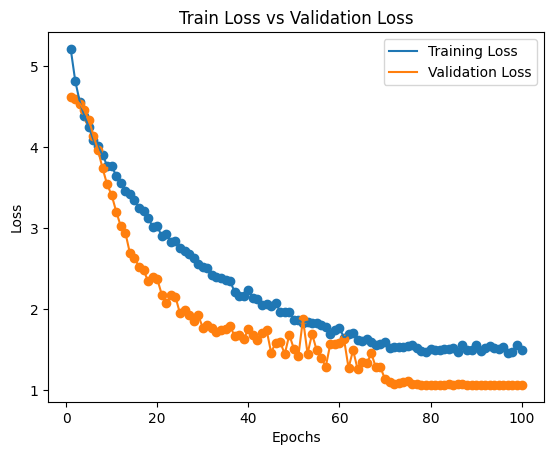

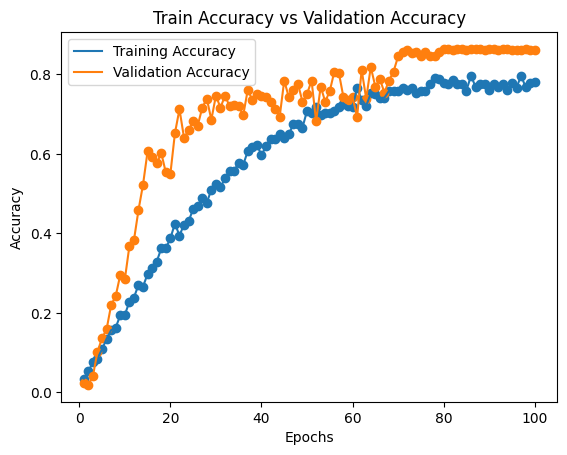

In [65]:
# Menampilkan akurasi pelatihan dan validasi beserta dengan jumlah epoch(iterasi)
train_acc_gru_lstm = history_hybrid_gru_lstm.history['accuracy']
val_acc_gru_lstm = history_hybrid_gru_lstm.history['val_accuracy']
train_loss_gru_lstm = history_hybrid_gru_lstm.history['loss']
val_loss_gru_lstm = history_hybrid_gru_lstm.history['val_loss']
epoch = range(1,len(train_acc_gru_lstm)+1)

# Plot training vs validation loss
plt.plot(epoch,train_loss_gru_lstm, label='Training Loss')
plt.scatter(epoch,train_loss_gru_lstm)
plt.plot(epoch,val_loss_gru_lstm, label='Validation Loss')
plt.scatter(epoch,val_loss_gru_lstm)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train Loss vs Validation Loss')
plt.legend()
plt.show()

# Plot training vs validation loss
plt.plot(epoch,train_acc_gru_lstm, label='Training Accuracy')
plt.scatter(epoch,train_acc_gru_lstm)
plt.plot(epoch,val_acc_gru_lstm, label='Validation Accuracy')
plt.scatter(epoch,val_acc_gru_lstm)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train Accuracy vs Validation Accuracy')
plt.legend()
plt.show()

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step
Test Evaluation Accuracy: 0.8371212121212122
Precision -->  0.8781749710726983
Weighted F1 Score: 0.8348398409842964


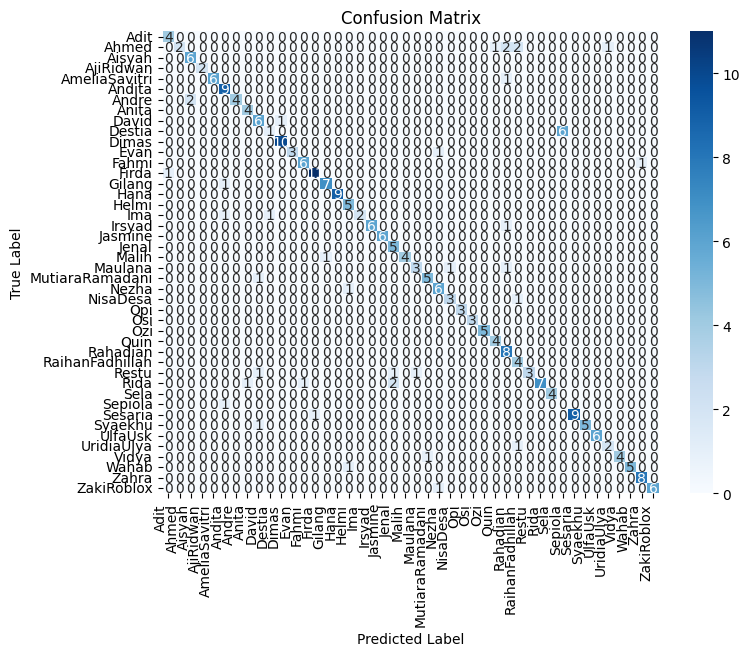

In [266]:
# Evaluate the model on the test set
y_pred_probabilities = model_hybrid_gru_lstm.predict(X_test)
y_pred = np.argmax(y_pred_probabilities, axis=1)

# Decode labels back to original format
y_test_decoded_gru_lstm = label_encoder.inverse_transform(y_test)
y_pred_decoded_gru_lstm = label_encoder.inverse_transform(y_pred)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test_decoded_gru_lstm, y_pred_decoded_gru_lstm, labels=speaker_folders)

# Calculate accuracy
accuracy_gru_lstm = accuracy_score(y_test_decoded_gru_lstm, y_pred_decoded_gru_lstm)
print(f"Test Evaluation Accuracy: {accuracy_gru_lstm}")

# calculate precision
precision_gru_lstm = precision_score(y_test_decoded_gru_lstm,y_pred_decoded_gru_lstm, average='weighted')
print(f"Precision --> ", precision_gru_lstm)

# Calculate F1 score
f1_gru_lstm = f1_score(y_test_decoded_gru_lstm, y_pred_decoded_gru_lstm, labels=speaker_folders, average='weighted')
print(f"Weighted F1 Score: {f1_gru_lstm}")

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=speaker_folders, yticklabels=speaker_folders)

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=90, ha="right")

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [92]:
model_hybrid_gru_lstm.save('gru-lstm.h5')

In [67]:
y_pred_prob_positive = y_pred_probabilities[:, 1]  # Assuming the second column is the positive class
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_positive, pos_label=1)
roc_auc_gru_lstm = auc(fpr, tpr)
roc_auc_gru_lstm

0.9697265625

# Evaluation Results

In [215]:
overall_acc = {
    #'RNN' : 0.5454,
    #'GRU' : 0.7537,
    #'LSTM' : 0.8522,
    'RNN-GRU' : 0.6590,
    'GRU-RNN' : 0.6287,
    'LSTM-RNN' : 0.5909,
    'RNN-LSTM' : 0.7272,
    'LSTM-GRU' : 0.7083,
    'GRU-LSTM' : 0.8371
}

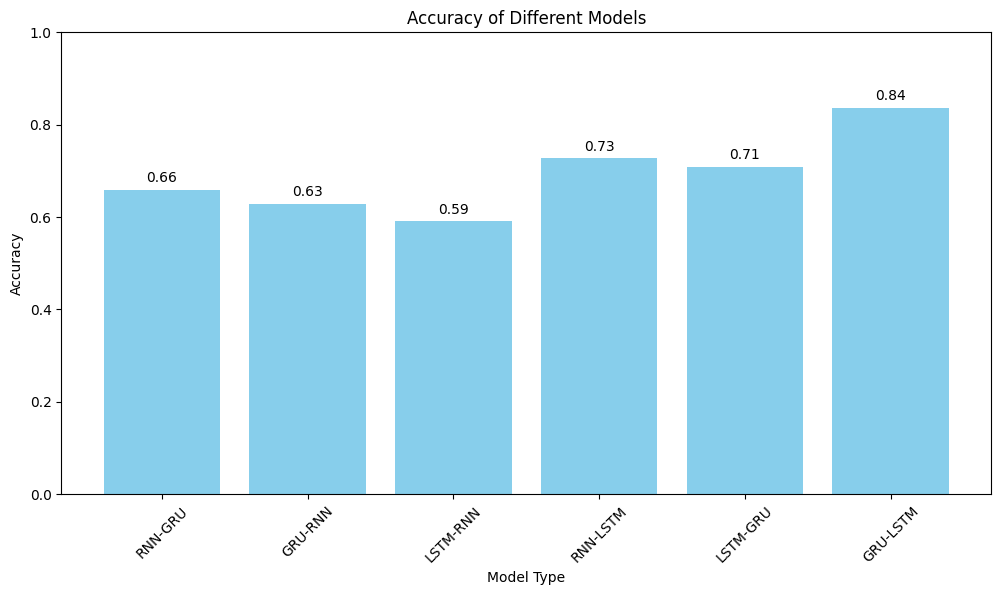

In [216]:
# List of model names and their corresponding accuracies
model_names = list(overall_acc.keys())
model_overall_acc = list(overall_acc.values())

# Create a barplot
plt.figure(figsize=(12, 6))
bars = plt.bar(model_names, model_overall_acc, color='skyblue')

# Add text annotations to display accuracy values above the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

plt.xlabel('Model Type')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Assuming accuracies are between 0 and 1
plt.show()

In [217]:
overall_precision = {
    #'RNN' : 0.5702,
    #'GRU' : 0.7904,
    #'LSTM' : 0.8818,
    'RNN-GRU' : 0.7122,
    'GRU-RNN' : 0.6681,
    'LSTM-RNN' : 0.6118,
    'RNN-LSTM' : 0.7804,
    'LSTM-GRU' : 0.7653,
    'GRU-LSTM' : 0.8781
}

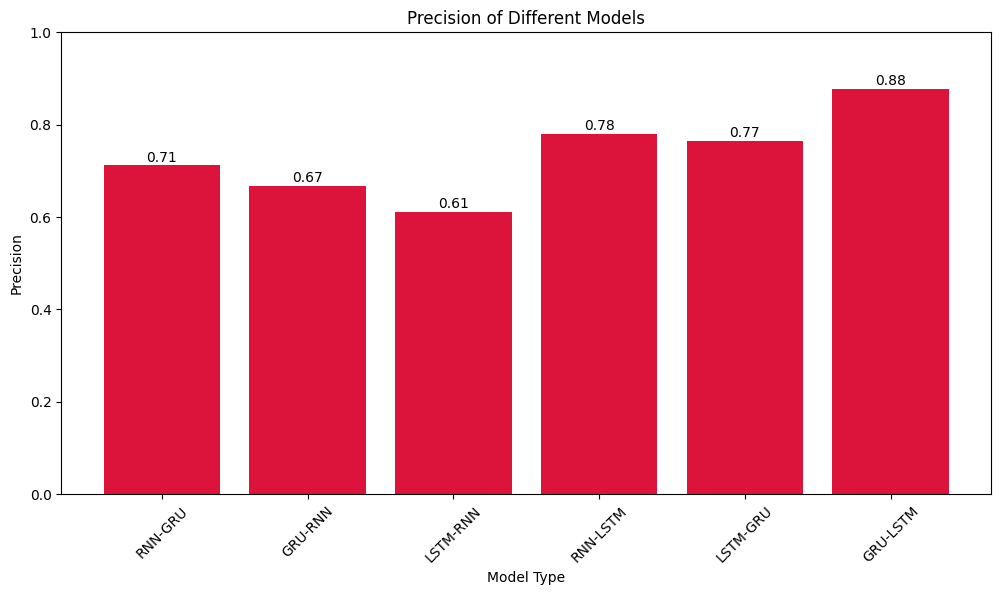

In [218]:
# List of model names and their corresponding accuracies
model_names = list(overall_precision.keys())
model_overall_precision = list(overall_precision.values())

# Create a barplot
plt.figure(figsize=(12, 6))
bars = plt.bar(model_names, model_overall_precision, color='crimson')

# Add text annotations to display accuracy values above the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.001, round(yval, 2), ha='center', va='bottom')

plt.xlabel('Model Type')
plt.ylabel('Precision')
plt.title('Precision of Different Models')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Assuming accuracies are between 0 and 1
plt.show()

In [219]:
# Placeholder for models and their names
models = {
    #"RNN": model_rnn,
    #"GRU": model_gru,
    #"LSTM": model_2,
    "RNN-GRU": model_hybrid_rnn_gru,
    "RNN-LSTM": model_hybrid_rnn_lstm,
    "GRU-RNN": model_hybrid_gru_rnn,
    "GRU-LSTM": model_hybrid_gru_lstm,
    "LSTM-GRU": model_hybrid_lstm_gru,
    "LSTM-RNN": model_hybrid_lstm_rnn
}

In [220]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from itertools import cycle

# Binarize the output for multi-class
y_test_binarized = label_binarize(y_test, classes=np.arange(len(speaker_folders)))
n_classes = y_test_binarized.shape[1]

# Placeholder for ROC data
fpr = dict()
tpr = dict()
roc_auc = dict()

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


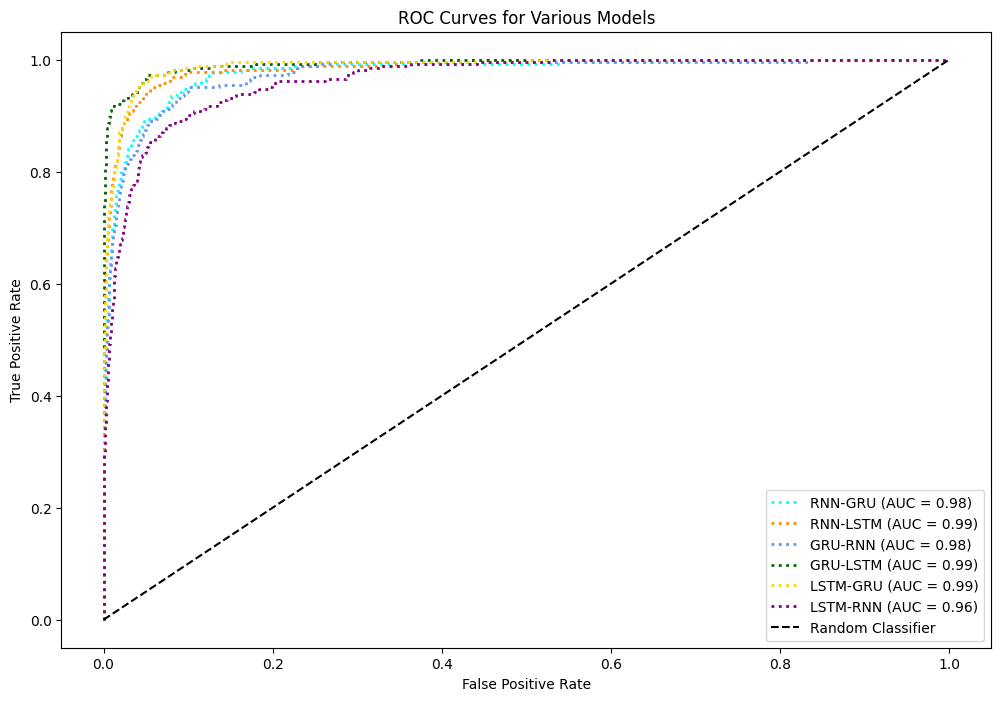

In [221]:
# Plotting setup
plt.figure(figsize=(12, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'darkgreen', 'gold', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'red', 'blue', 'yellow', 'green'])

# Iterate through each model
for (model_name, model), color in zip(models.items(), colors):
    # Predict probabilities for test data
    y_pred_probabilities = model.predict(X_test)

    # Compute ROC curve and ROC area for each class
    fpr[model_name] = dict()
    tpr[model_name] = dict()
    roc_auc[model_name] = dict()
    
    for i in range(n_classes):
        fpr[model_name][i], tpr[model_name][i], _ = roc_curve(y_test_binarized[:, i], y_pred_probabilities[:, i])
        roc_auc[model_name][i] = auc(fpr[model_name][i], tpr[model_name][i])
    
    # Compute micro-average ROC curve and ROC area
    fpr[model_name]["micro"], tpr[model_name]["micro"], _ = roc_curve(y_test_binarized.ravel(), y_pred_probabilities.ravel())
    roc_auc[model_name]["micro"] = auc(fpr[model_name]["micro"], tpr[model_name]["micro"])
    
    # Plot the micro-average ROC curve
    plt.plot(fpr[model_name]["micro"], tpr[model_name]["micro"], color=color, lw=2, linestyle=':',
             label=f'{model_name} (AUC = {roc_auc[model_name]["micro"]:.2f})')

# Plot the diagonal line for a random classifier
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Various Models')
plt.legend(loc='best')
plt.show()

In [233]:
histories = {
    #"RNN": history_rnn,
    #"GRU": history_gru,
    #"LSTM": history_2,
    #"RNN-GRU": history_hybrid_rnn_gru,
    "RNN-LSTM": history_hybrid_rnn_lstm,
    #"GRU-RNN": history_hybrid_gru_rnn,
    "GRU-LSTM": history_hybrid_gru_lstm,
    "LSTM-GRU": history_hybrid_lstm_gru,
    #"LSTM-RNN": history_hybrid_lstm_rnn
}


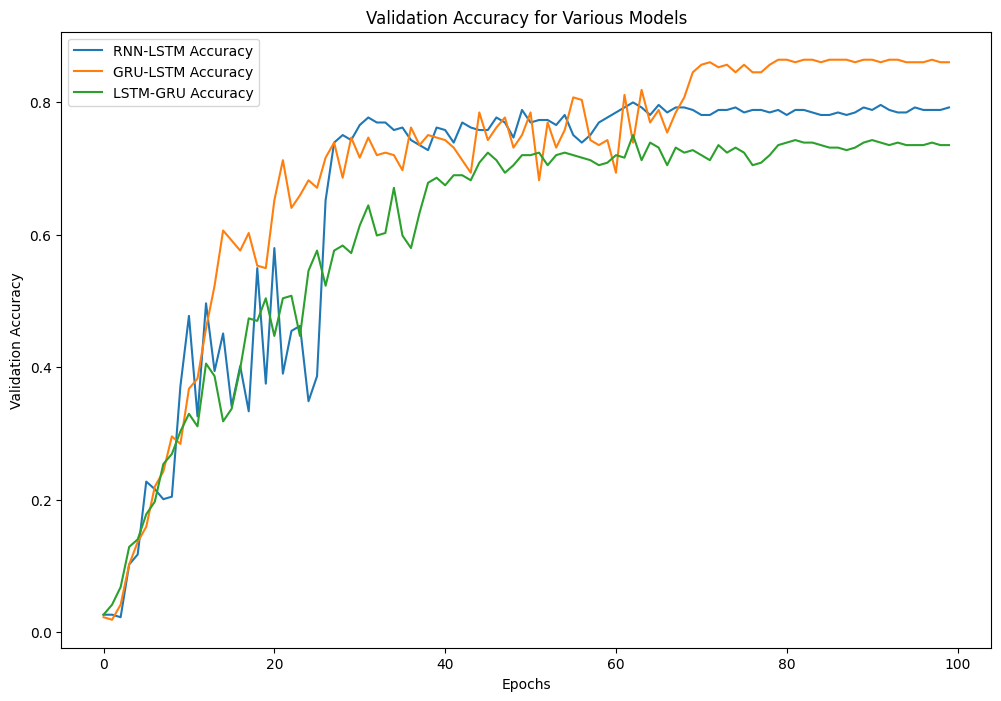

In [234]:
plt.figure(figsize=(12, 8))

for model_name, history in histories.items():
    plt.plot(history.history['val_accuracy'], label=f'{model_name} Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy for Various Models')
plt.legend(loc='best')
plt.show()

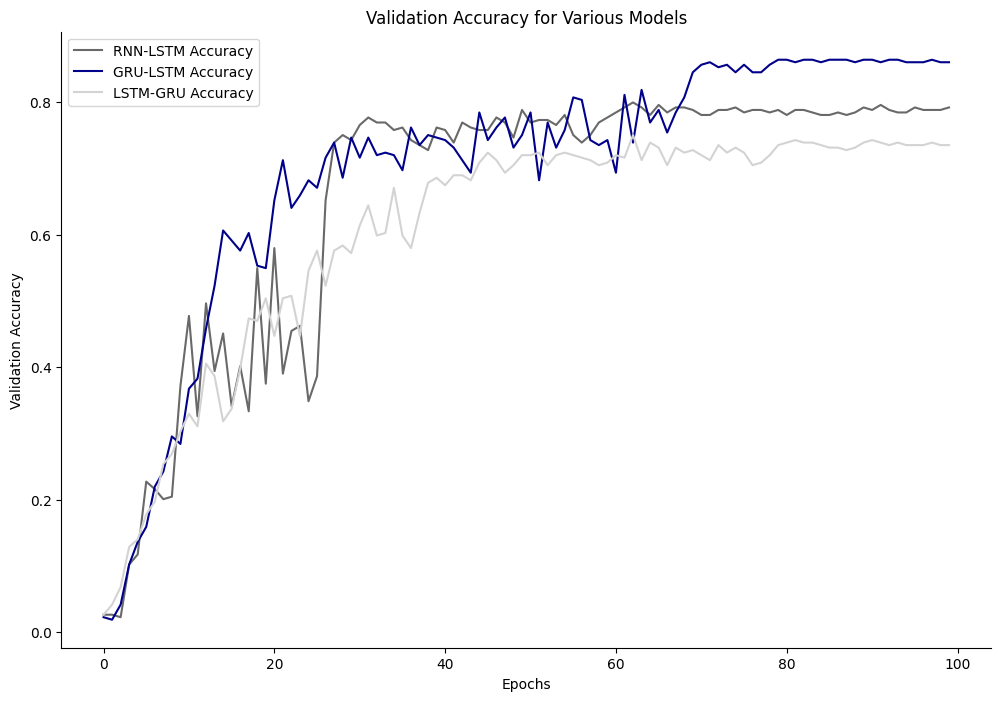

In [236]:
plt.figure(figsize=(12, 8))

# Plot hanya untuk model GRU-LSTM, LSTM-GRU, dan RNN-LSTM
colors = {
    "GRU-LSTM": 'darkblue',
    "LSTM-GRU": 'lightgrey',
    "RNN-LSTM": 'dimgrey'
}

for model_name, history in histories.items():
    if model_name in colors:
        plt.plot(history.history['val_accuracy'], label=f'{model_name} Accuracy', color=colors[model_name])

plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy for Various Models')
plt.legend(loc='best')

# Menghilangkan garis sumbu x dan y
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

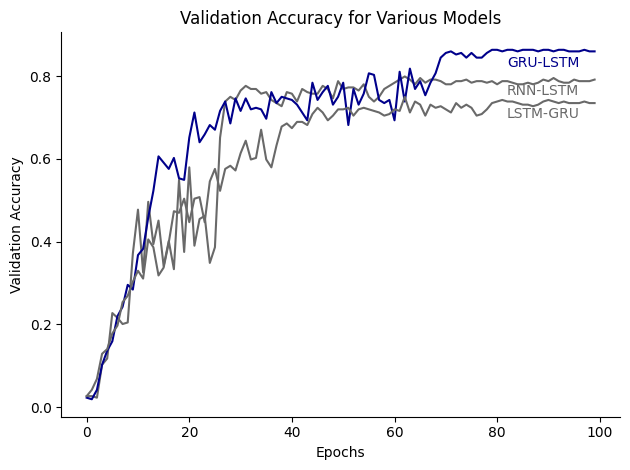

In [252]:
# Plot hanya untuk model GRU-LSTM, LSTM-GRU, dan RNN-LSTM
colors = {
    "GRU-LSTM": 'darkblue',
    "LSTM-GRU": 'dimgray',
    "RNN-LSTM": 'dimgray'
}

for model_name, history in histories.items():
    if model_name in colors:
        plt.plot(history.history['val_accuracy'], label=None, color=colors[model_name])
        # Annotate untuk menambahkan label di ujung garis
        plt.annotate(f'{model_name}', (len(history.history['val_accuracy'])-1, history.history['val_accuracy'][-1]),
                     textcoords='offset points', xytext=(-11,-11), ha='right', fontsize=10, color=colors[model_name])

plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy for Various Models')

# Menghilangkan garis sumbu x dan y
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

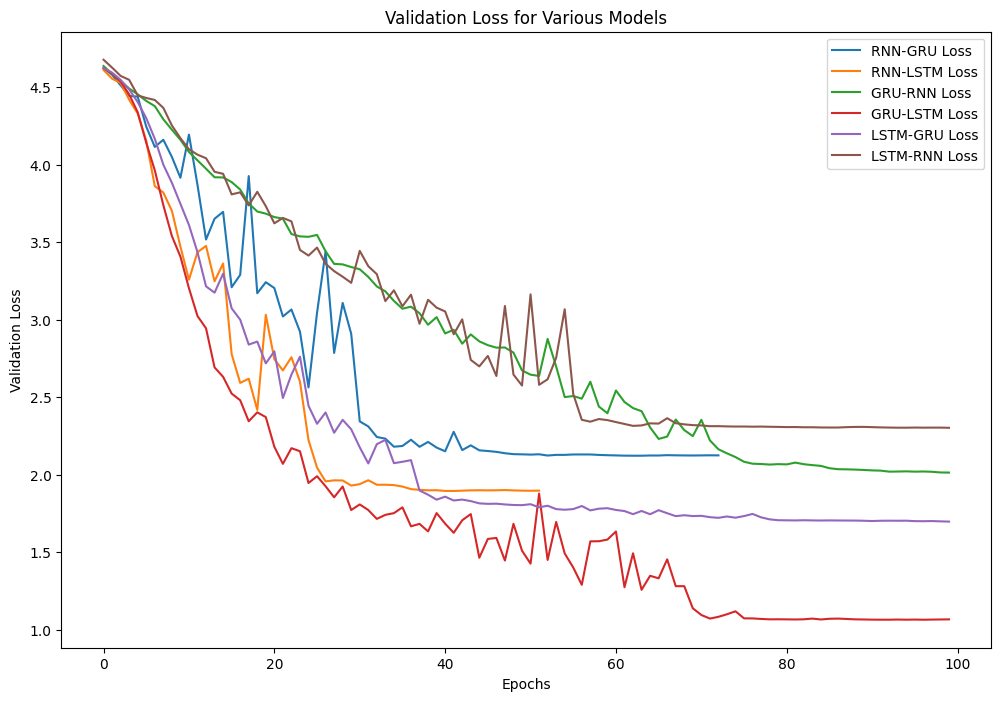

In [225]:
plt.figure(figsize=(12, 8))

for model_name, history in histories.items():
    plt.plot(history.history['val_loss'], label=f'{model_name} Loss')

plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.title('Validation Loss for Various Models')
plt.legend(loc='best')
plt.show()

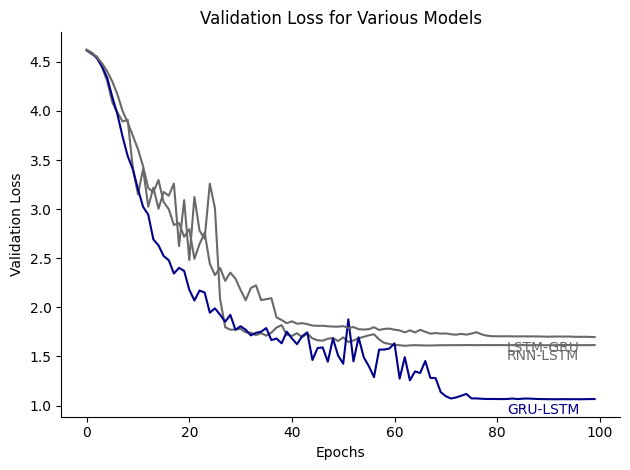

In [256]:
# Plot hanya untuk model GRU-LSTM, LSTM-GRU, dan RNN-LSTM
colors = {
    "GRU-LSTM": 'darkblue',
    "LSTM-GRU": 'dimgray',
    "RNN-LSTM": 'dimgray'
}

for model_name, history in histories.items():
    if model_name in colors:
        plt.plot(history.history['val_loss'], label=None, color=colors[model_name])
        # Annotate untuk menambahkan label di ujung garis
        plt.annotate(f'{model_name}', (len(history.history['val_loss'])-1, history.history['val_loss'][-1]),
                     textcoords='offset points', xytext=(-11,-11), ha='right', fontsize=10, color=colors[model_name])

plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.title('Validation Loss for Various Models')

# Menghilangkan garis sumbu x dan y
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

#  Statistical Inference Phase

In [211]:
# Path to the audio file
audio_file_path = "D:\\PERKULIAHAN\\pyenv\\VOICECLONE\\voice_resampled\\segments\\David\\32.wav"

# Function to extract features from a single audio file
def extract_features_from_file(file_path):
    audio, sr = librosa.load(file_path, sr=None, duration=1)
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
    
    # Normalize MFCC features
    mfccs = StandardScaler().fit_transform(mfccs)
    
    return mfccs.T

In [212]:
# Extract features from the audio file
sample_features = extract_features_from_file(audio_file_path)
sample_features = np.expand_dims(sample_features, axis=0)

In [213]:
from keras.models import load_model
# Load the trained model
model = load_model('lstm.h5')

# Perform predictions 10 times and store the results
predictions = []
for _ in range(10):
    predicted_label = model.predict(sample_features)
    predictions.append(predicted_label)

# Convert list of predictions to numpy array for easier manipulation
predictions = np.array(predictions)

# Calculate the mean prediction
mean_predictions = np.mean(predictions, axis=0)

# Get the indices of the top 3 highest mean predictions
top_3_indices = np.argsort(mean_predictions[0])[-3:][::-1]

# Get the corresponding speaker labels and their confidence scores
top_3_speakers = [(speaker_folders[idx], mean_predictions[0][idx]) for idx in top_3_indices]

# Print the top 3 predicted speakers with their confidence scores
print("Top 3 predicted speakers with confidence scores:")
for speaker, score in top_3_speakers:
    print(f"Speaker: {speaker}, Confidence: {score:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Top 3 predicted speakers with confidence scores:
Speaker: David, Confidence: 0.8952
Speaker: Dimas, Confidence: 0.0370
Speaker: Ahmed, Confidence: 0.0198


In [214]:
from keras.models import load_model
# Load the trained model
model = load_model('gru-lstm.h5')

# Perform predictions 10 times and store the results
predictions = []
for _ in range(10):
    predicted_label = model.predict(sample_features)
    predictions.append(predicted_label)

# Convert list of predictions to numpy array for easier manipulation
predictions = np.array(predictions)

# Calculate the mean prediction
mean_predictions = np.mean(predictions, axis=0)

# Get the indices of the top 3 highest mean predictions
top_3_indices = np.argsort(mean_predictions[0])[-3:][::-1]

# Get the corresponding speaker labels and their confidence scores
top_3_speakers = [(speaker_folders[idx], mean_predictions[0][idx]) for idx in top_3_indices]

# Print the top 3 predicted speakers with their confidence scores
print("Top 3 predicted speakers with confidence scores:")
for speaker, score in top_3_speakers:
    print(f"Speaker: {speaker}, Confidence: {score:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Top 3 predicted speakers with confidence scores:
Speaker: David, Confidence: 0.6156
Speaker: Dimas, Confidence: 0.1331
Speaker: UridiaUlya, Confidence: 0.0348
